# AQI Dashboard: Descriptive Statistics

In [1]:
%matplotlib inline

In [2]:
# Dependencies
from ipywidgets import interact
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pprint import pprint
import openweathermapy.core as owm
import seaborn as sns
import numpy as np
from pprint import pprint

In [3]:
#Load the EPA's Air Quality System data for 2016 and 2017
sfb17_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
sfb17_data = pd.read_csv(sfb17_csv) #For 2017 (IMPORTANT: data available for Jan. - Sep.)
sfb16_csv = "Raw_Data/EPA_AQI_2016_SFBAY.csv"

sfb16_data = pd.read_csv(sfb16_csv) #For 2016 (Comprehensive for the whole of 2016)
print(sfb16_data.columns) #To view table's attributes
print(sfb17_data.columns) 
print("------------------------------")
print(sfb16_data.shape) #To view data's size
print(sfb17_data.shape)
# print("------------------------------")
# print(.dtypes) #To view attributes by type

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
------------------------------
(3292, 10)
(2217, 10)


interactive(children=(Dropdown(description='bins', options=('county Name', 'Defining Parameter'), value='county Name'), Output()), _dom_classes=('widget-interact',))

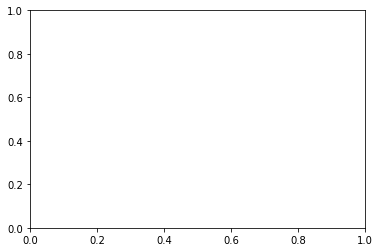

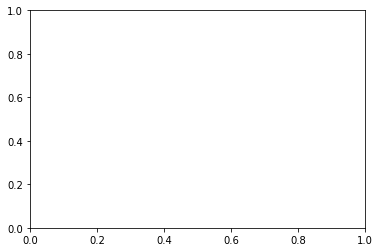

In [5]:
#Show the distribution of AQI

@interact(bins=["county Name","Defining Parameter"])
def plot(bins):
   _=sns.distplot(sfb17_data, bins=bins)

AxesSubplot(0.125,0.125;0.775x0.755)


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6


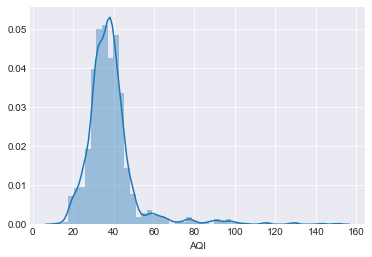

In [67]:
SFB_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
SFB_data = pd.read_csv(SFB_csv)
time_series_17 = SFB_data.Date
AQI = SFB_data.AQI
Category = SFB_data.Category
Ozone_param = SFB_data[SFB_data["Defining Parameter"] == 'Ozone']
Ozone_param_y = Ozone_param.AQI
Ozone_param_x = Ozone_param.Date
print(sns.distplot(Ozone_param_y))
# plt.bar(Ozone_param_x, Ozone_param_y) #AQI for Ozone measurement over 2017; need to bin dates into months
                        #and average values where the date is the same for a county's measurement.
SFB_data.head()

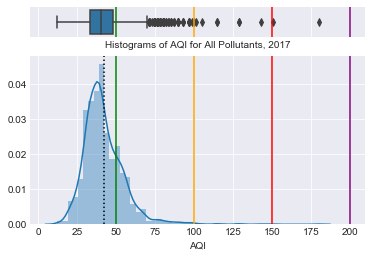

In [68]:
#Hist for all AQIs

Avg_AQI = SFB_data.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(SFB_data.AQI, ax=ax_box)
sns.distplot(SFB_data.AQI, ax=ax_hist)
plt.axvline(Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, 2017')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

[Text(0.5,0,'Histograms of AQI for Nitrogen Dioxide')]

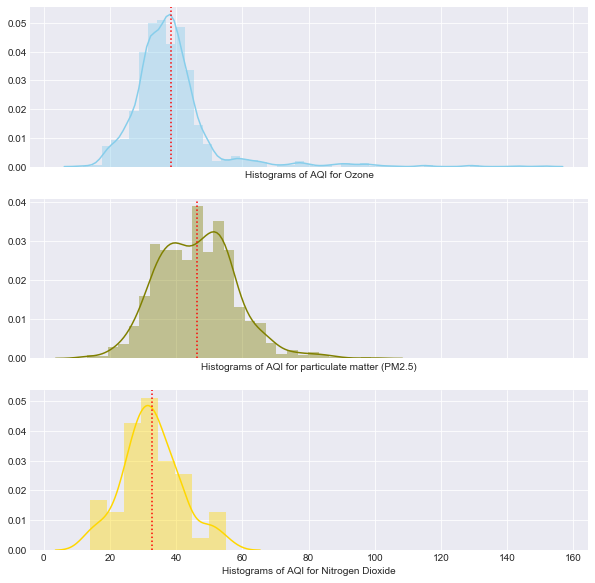

In [69]:
# source : https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

#Mean AQIs per pollutants

m_Oz=SFB_data[SFB_data["Defining Parameter"] == 'Ozone'].AQI.mean()
m_Pm25=SFB_data[SFB_data["Defining Parameter"] == 'PM2.5'].AQI.mean()
m_NO2=SFB_data[SFB_data["Defining Parameter"] == 'NO2'].AQI.mean()

# sns.distplot(SFB_data.AQI) #Hist for all AQIs

f, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'Ozone'].AQI , 
             color="skyblue", ax=axes[0],label = "Ozone")
axes[0].axvline(m_Oz, linestyle="dotted",color='r')
axes[0].set(xlabel='Histograms of AQI for Ozone')

sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'PM2.5'].AQI , 
             color="olive", ax=axes[1],label = "PM2.5")
axes[1].axvline(m_Pm25, linestyle="dotted",color='r')
axes[1].set(xlabel='Histograms of AQI for particulate matter (PM2.5)')

sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'NO2'].AQI , 
             color="gold", ax=axes[2],label = "NO2")
axes[2].axvline(m_NO2, linestyle="dotted",color='r')
axes[2].set(xlabel='Histograms of AQI for Nitrogen Dioxide')

# sns.distplot( SFB_data.AQI , color="coral", ax=axes[1, 1],label = "All")
# plt.axvline(Avg_AQI, linestyle="dotted",color='black')

# plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
# sns.plt.legend()

# plt.xlabel("Histogram of Pollutants' AQI")

In [208]:
#Binning dates into months

SFB_data['Months']=SFB_data.Date.apply(lambda x: str(x)[:1]) #isolate the month
# SFB_data['Months']= SFB_data['Months'].replace({'1': "January",'2': "February",
#                                       '3': "March",'4': "April",
#                                       '5': "May",'6': "June",
#                                       '7': "July",'8': "August",
#                                        '9': "September"})
SFB_data['Months'].unique()
SFB_data['Months'].head
SFB_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Months
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6,1
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6,1
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6,1
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6,1
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6,1


Months
1    43.541219
2    38.190476
3    37.577061
4    41.896296
5    40.000000
6    39.951852
7    42.845878
8    50.949821
9    47.166667
Name: AQI, dtype: float64


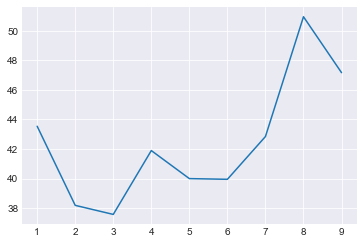

In [71]:
SFB_data_months_m = SFB_data.groupby("Months").mean() 
AQI_m_permonths = SFB_data_months_m.AQI
AQI_m_permonths #Trendline
SFB_data.Category.unique()
print(AQI_m_permonths)

#Avg. AQI per month during 2017
sns.set_style("darkgrid")
plt.plot(AQI_m_permonths)
plt.axhline(Avg_AQI, linestyle="dotted",color='black')
plt.show()

Ozone    1157
PM2.5    1011
NO2        46
SO2         2
PM10        1
Name: Defining Parameter, dtype: int64


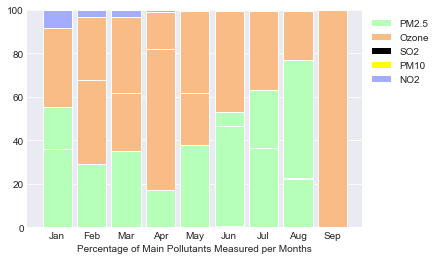

In [72]:
SFB_data_params = SFB_data.groupby('Defining Parameter')

print(SFB_data['Defining Parameter'].value_counts())

    #Gather the count of the measured parameters per month (for param_count)
Jan = SFB_data[SFB_data["Months"] == '1']
# print(Jan['Defining Parameter'].value_counts())
Feb = SFB_data[SFB_data["Months"] == '2']
# print(Feb['Defining Parameter'].value_counts())
Mar = SFB_data[SFB_data["Months"] == '3']
# print(Mar['Defining Parameter'].value_counts())
Apr = SFB_data[SFB_data["Months"] == '4']
# print(Apr['Defining Parameter'].value_counts())
May = SFB_data[SFB_data["Months"] == '5']
# print(May['Defining Parameter'].value_counts())
Jun = SFB_data[SFB_data["Months"] == '6']
# print(Jun['Defining Parameter'].value_counts())
Jul = SFB_data[SFB_data["Months"] == '7']
# print(Jul['Defining Parameter'].value_counts())
Aug = SFB_data[SFB_data["Months"] == '8']
# print(Aug['Defining Parameter'].value_counts())
Sep = SFB_data[SFB_data["Months"] == '9']
# print(Sep['Defining Parameter'].value_counts())

    #Percent Stacked Barplot of Pollutants over the months
    # https://python-graph-gallery.com/13-percent-stacked-barplot/
r = [0,1,2,3,4,5,6,7,8]
param_count = {'PM2.5':[155,73,98,46,106,143,176,214,0],
               'Ozone': [101,171,172,221,172,126,102,62,30],
               'NO2': [23,8,9,3,1,0,1,1,0],
               'SO2': [0,0,0,0,0,0,0,1,0],
               'PM10':[0,0,0,0,0,1,0,0,0]
              }
df_par = pd.DataFrame(param_count)

totals = [i+j+k+l+m for i,j,k,l,m in zip(df_par['PM2.5'], df_par['Ozone'], df_par['NO2'], df_par['SO2'], df_par['PM10'])]
PM25 = [i / j * 100 for i,j in zip(df_par['PM2.5'], totals)]
Ozone = [i / j * 100 for i,j in zip(df_par['Ozone'], totals)]
NO2 = [i / j * 100 for i,j in zip(df_par['NO2'], totals)]
SO2 = [i / j * 100 for i,j in zip(df_par['SO2'], totals)]
PM10 = [i / j * 100 for i,j in zip(df_par['PM10'], totals)]

barWidth = 0.85
names = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep')
plt.bar(r, PM25, color='#b5ffb9', edgecolor='white', width=barWidth,label ="PM2.5" ) #green
plt.bar(r, Ozone, bottom=PM25, color='#f9bc86', edgecolor='white', width=barWidth,label ="Ozone") #orange
plt.bar(r, SO2, bottom=Ozone, color='#000000', edgecolor='white', width=barWidth,label ="SO2") #black
plt.bar(r, PM10, bottom=SO2, color='#FFFF00', edgecolor='white', width=barWidth,label ="PM10") #yellow
plt.bar(r, NO2, bottom=[i+j+k+l for i,j,k,l in zip(PM25, Ozone,SO2,PM10)], color='#a3acff', edgecolor='white', width=barWidth,label ="NO2") # blue

plt.xticks(r, names)
plt.xlabel("Percentage of Main Pollutants Measured per Months")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

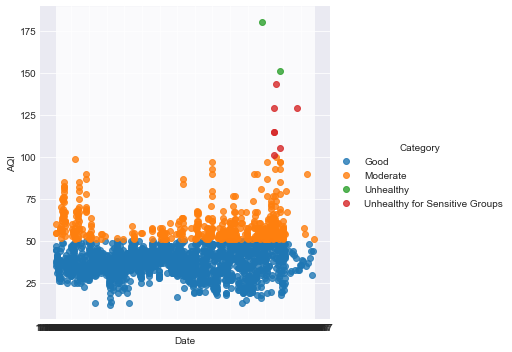

In [73]:
#AQI Distribution for each measurement date
sns.lmplot( x="Date", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)

State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
Months                        int32
dtype: object


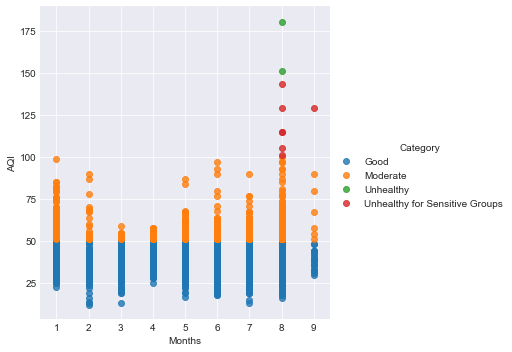

In [74]:
SFB_data.Months=SFB_data.Months.astype(int)
print(SFB_data.dtypes)

#AQI Distribution by months
# colors = {'Good':'#FFD700', 'Moderate':'#87CEFA', 'Unhealthy':'#F08080','Unhealthy':'#F08080'}
sns.lmplot( x="Months", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)
# plt.legend(loc='lower right')

# labels = ['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups']

In [202]:
    # IMPORTANT: AIRNOW API has a 500 hourly request limit per user

import pandas as pd
import json
import requests
from pprint import pprint
Zip_csv = "Raw_Data/countyData.csv"
Zip_data = pd.read_csv(Zip_csv)
# zipdf = (pd.read_csv('CSV/output.csv'))
Zip_data = Zip_data.head(441)
Zip_data = Zip_data.sample(frac=1)

apikey = "9A3C2971-7F57-4B80-8908-B2A548BD66FD"
#base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94538&date=2017-10-02T00-0000&distance=00&API_KEY="+apikey
x=0
date_range = ["09","10","11","12","13","14","15"]
i=0
airnow_list=[]
count = 0
for row in Zip_data.itertuples(index=True, name='Pandas'):
   count=count+1
   print (getattr(row, "County"), getattr(row, "Zipcode"))
   zipcode = getattr(row, "Zipcode")
   print(zipcode)
   if (i<7):
       date = "2017-10-"+str(date_range[i])+"T00-0000"
       print(date)
       i=i+1
   else:
       i=0
   
   base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode="+str(zipcode)+"&date="+date+"&distance=25&API_KEY="+apikey
   print(base_url)
   response =  requests.get(base_url).json()
#     print(response)
   airnow_list.append({ str(zipcode): response })
   df1 = pd.concat([pd.concat({k: pd.DataFrame(v) for k, v in x.items()}) for x in airnow_list]).reset_index(level=1, drop=True).reset_index().rename(columns={'index':'zip'})

Marin County 94930
94930
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94930&date=2017-10-09T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94601
94601
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94601&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Solano County 94571
94571
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94571&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Napa County 94515
94515
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94515&date=2017-10-12T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Napa County 94574
94574
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?for

Contra Costa County 94611
94611
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94611&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Sonoma County 94927
94927
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94927&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
San Francisco County 94109
94109
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94109&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Solano County 94535
94535
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94535&date=2017-10-09T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Marin County 94903
94903
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format

Alameda County 94607
94607
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94607&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Sonoma County 95480
95480
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95480&date=2017-10-12T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94618
94618
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94618&date=2017-10-13T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 95173
95173
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95173&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Solano County 95616
95616
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/hist

Contra Costa County 94598
94598
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94598&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Marin County 94973
94973
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94973&date=2017-10-09T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Solano County 94585
94585
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94585&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94501
94501
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94501&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Solano County 94534
94534
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=appli

Santa Clara County 95170
95170
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95170&date=2017-10-13T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Sonoma County 95433
95433
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95433&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
San Mateo County 94404
94404
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94404&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Sonoma County 95406
95406
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95406&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Napa County 94591
94591
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=appli

Alameda County 94619
94619
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94619&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Sonoma County 95461
95461
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95461&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 95015
95015
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95015&date=2017-10-12T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Marin County 94939
94939
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94939&date=2017-10-13T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
San Francisco County 94147
94147
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode

Santa Clara County 95002
95002
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95002&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94541
94541
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94541&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94551
94551
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94551&date=2017-10-09T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 95013
95013
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95013&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
San Francisco County 94129
94129
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/

Sonoma County 95402
95402
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95402&date=2017-10-12T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94602
94602
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94602&date=2017-10-13T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Sonoma County 94574
94574
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94574&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94720
94720
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94720&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 94306
94306
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=appl

Alameda County 95391
95391
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95391&date=2017-10-09T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Sonoma County 95487
95487
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95487&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 95150
95150
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95150&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94606
94606
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94606&date=2017-10-12T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94621
94621
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/his

Alameda County 94604
94604
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94604&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 95136
95136
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95136&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94514
94514
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94514&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Marin County 94914
94914
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94914&date=2017-10-09T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Alameda County 94568
94568
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=appl

Alameda County 94710
94710
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94710&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Contra Costa County 94518
94518
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94518&date=2017-10-12T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
San Francisco County 94131
94131
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94131&date=2017-10-13T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 95126
95126
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95126&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 95026
95026
2017-10-15T00-0000
http://www.airnowapi.org/aq/observa

Solano County 94512
94512
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94512&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Sonoma County 95404
95404
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95404&date=2017-10-09T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 95122
95122
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95122&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Santa Clara County 94022
94022
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94022&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
Contra Costa County 94820
94820
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?fo

In [203]:
# #Save to csv
# df.to_csv("AirNow_data_Hadrien.csv") #First iteration
df1.to_csv("AirNow_data_Hadrien_2.csv") #Second iteration

In [213]:
#Import csv as pd
AirNow_1_csv = "AirNow_data_Hadrien.csv"
AirNow_1_df = pd.read_csv(AirNow_1_csv)
AirNow_2_csv = "AirNow_data_Hadrien_2.csv"
AirNow_2_df = pd.read_csv(AirNow_2_csv)

print(AirNow_1_df.shape)
print(AirNow_2_df.shape)
AirNow_1_df.head()


(828, 12)
(834, 12)


,Unnamed: 0,zip,AQI,Category,DateObserved,HourObserved,Latitude,LocalTimeZone,Longitude,ParameterName,ReportingArea,StateCode
0,0,95015,54,"{'Number': 2, 'Name': 'Moderate'}",2017-10-09,0,37.3300,PST,-121.9000,OZONE,San Jose,CA
1,1,95015,47,"{'Number': 1, 'Name': 'Good'}",2017-10-09,0,37.3300,PST,-121.9000,PM2.5,San Jose,CA
2,2,94505,45,"{'Number': 1, 'Name': 'Good'}",2017-10-10,0,37.9699,PST,-121.3067,OZONE,Stockton,CA
3,3,94505,77,"{'Number': 2, 'Name': 'Moderate'}",2017-10-10,0,37.9699,PST,-121.3067,PM2.5,Stockton,CA
4,4,95486,39,"{'Number': 1, 'Name': 'Good'}",2017-10-11,0,38.4500,PST,-122.7000,OZONE,Santa Rosa,CA


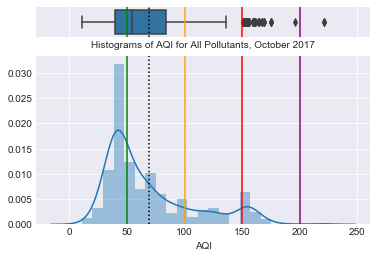

In [207]:
    #First DF
dfair_Avg_AQI = AirNow_1_df.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(AirNow_1_df.AQI, ax=ax_box)
sns.distplot(AirNow_1_df.AQI, ax=ax_hist)
plt.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, October 2017')
ax_box.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

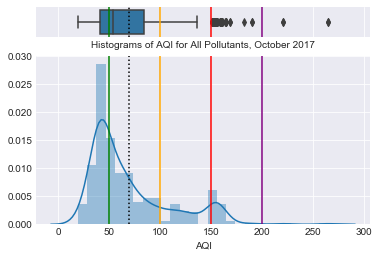

In [206]:
    #DF2
    
df_Avg_AQI = AirNow_2_df.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(AirNow_2_df.AQI, ax=ax_box)
sns.distplot(AirNow_2_df.AQI, ax=ax_hist)
plt.axvline(df_Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, October 2017')
ax_box.axvline(df_Avg_AQI, linestyle="dotted",color='black')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

##################################

In [231]:
#Bin by Day
AirNow_1_df['Day']=AirNow_1_df.DateObserved.apply(lambda x: str(x)[8:])
AirNow_1_df['Day']
# del AirNow_1_df['Days']
AirNow_1_df.head()

,Unnamed: 0,zip,AQI,Category,DateObserved,HourObserved,Latitude,LocalTimeZone,Longitude,ParameterName,ReportingArea,StateCode,Day
0,0,95015,54,"{'Number': 2, 'Name': 'Moderate'}",2017-10-09,0,37.3300,PST,-121.9000,OZONE,San Jose,CA,09
1,1,95015,47,"{'Number': 1, 'Name': 'Good'}",2017-10-09,0,37.3300,PST,-121.9000,PM2.5,San Jose,CA,09
2,2,94505,45,"{'Number': 1, 'Name': 'Good'}",2017-10-10,0,37.9699,PST,-121.3067,OZONE,Stockton,CA,10
3,3,94505,77,"{'Number': 2, 'Name': 'Moderate'}",2017-10-10,0,37.9699,PST,-121.3067,PM2.5,Stockton,CA,10
4,4,95486,39,"{'Number': 1, 'Name': 'Good'}",2017-10-11,0,38.4500,PST,-122.7000,OZONE,Santa Rosa,CA,11


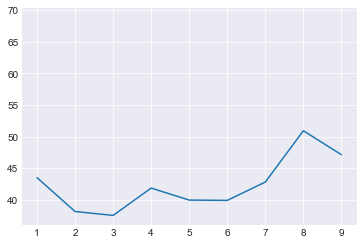

In [232]:
AirNow_1_df_day_m = AirNow_1_df.groupby("Day").mean()
AirNow_1_df_m = AirNow_1_df.AQI.mean()
AQI_m_perday = AirNow_1_df_day_m.AQI
AQI_m_perday #Trendline
# SFB_data.Category.unique()
# print(AQI_m_permonths)

#Avg. AQI per day during Oct. 9th-15th 2017
sns.set_style("darkgrid")
plt.plot(AQI_m_permonths)
plt.axhline(AirNow_1_df_m, linestyle="dotted",color='black')
plt.show()

Unnamed: 0         int64
zip                int64
AQI                int64
Category          object
DateObserved      object
HourObserved       int64
Latitude         float64
LocalTimeZone     object
Longitude        float64
ParameterName     object
ReportingArea     object
StateCode         object
Day                int32
dtype: object


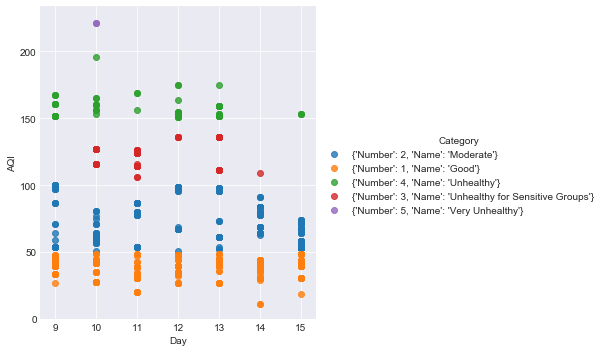

In [238]:
AirNow_1_df.Day=AirNow_1_df.Day.astype(int)
print(AirNow_1_df.dtypes)

#AQI Distribution by months
# colors = {'Good':'#FFD700', 'Moderate':'#87CEFA', 'Unhealthy':'#F08080','Unhealthy':'#F08080'}
sns.lmplot( x="Day", y="AQI", data=AirNow_1_df, fit_reg=False, hue='Category', legend=True)
# plt.legend(loc='lower right')

# labels = ['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups']

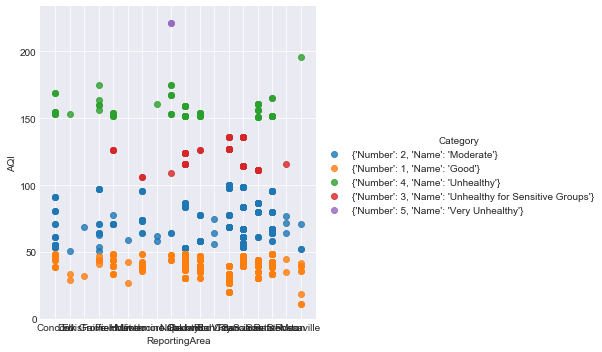

In [241]:
sns.lmplot( x="ReportingArea", y="AQI", data=AirNow_1_df, fit_reg=False, hue='Category', legend=True)

In [ ]:
                                    # Test Code

In [ ]:
# Sample 70 zip locations for each day between Oct 9th-15th
    #ME: Download 2016 dataset
        #Create appropriate viz for EPA dataset
            #descriptive dataset
            #Time
            #Pollutant
            #location
    #Look at choropleth map library
    

In [234]:
# #Query by zip code

# url_z = "http://www.airnowapi.org/aq/observation/zipCode/current/?format=application/json&zipCode=94133&distance=25&API_KEY=E2D50D6C-9124-4349-8C9A-96C411439052"
# print(requests.get(url_z))

In [ ]:
# url1 ="https://aqs.epa.gov/api/rawData?user=hp.nunes@protonmail.com&pw=cobalthawk52&format=AQCSV&pc=AQI_POLLUTANTS&bdate=20170101&edate=20171231&state=06&county=001&county=013&county=041&county=055&county=075&county=081&county=085&county=095&county=097"
# request1 = requests.get(url1).json()
# print(request1)
# pprint(request_json)

#Variables of interest:
    #AQI except filter where AQI = -1
    #Category
    #Lat, Long
    #StateCode
    #ReportingArea
    #DateForecast & DateIssue
    #ParameterName
        #link to documentation: https://docs.airnowapi.org/forecastsbylatlon/docs

In [233]:
# request_z = requests.get(url_z)
# request_z_json=request_z.json()
# pprint(request_z_json)